In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

zoo_animals = pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\KNN\\Zoo.csv",header=0)
zoo_animals.drop(['animal name'],axis=1,inplace=True)
zoo_animals

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [34]:
# Normalizing the numerical data
zooanimals_normalized = pd.DataFrame(data = scale(zoo_animals.iloc[:,0:16]), columns = ['Hair', 'Feathers', 'Eggs', 'Milk', 'Airborne', 'Aquatic', 'Predator','Toothed', 'Backbone', 'Breathes', 'Venomous', 'Fins', 'Legs', 'Tail','Domestic', 'Catsize'])
zooanimals_normalized['Type']=zoo_animals['type']
zooanimals_normalized

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,1
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,1
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,4
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,1
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180,1
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595,6
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,1
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595,7


In [35]:
# Training and Test data using
df_train,df_test = train_test_split(zooanimals_normalized,test_size = 0.15,random_state=8)

# KNN using sklearn
# for 3 nearest neighbours
knc = KNeighborsClassifier(n_neighbors= 3)

# Fitting with training data
knc.fit(df_train.iloc[:,0:16],df_train.iloc[:,16])
# train accuracy
accuracy_train = np.mean(knc.predict(df_train.iloc[:,0:16])==df_train.iloc[:,16])  #96%
# test accuracy
accuracy_test = np.mean(knc.predict(df_test.iloc[:,0:16])==df_test.iloc[:,16])   #93%

In [36]:
accuracy_list = []
# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and
# storing the accuracy values

for i in range(3, 50, 2):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(df_train.iloc[:,0:16],df_train.iloc[:,16])
    accuracy_train = np.mean(knc.predict(df_train.iloc[:,0:16])==df_train.iloc[:,16])
    accuracy_test = np.mean(knc.predict(df_test.iloc[:,0:16])==df_test.iloc[:,16])
    accuracy_list.append([accuracy_train, accuracy_test])
accuracy_list

[[0.9647058823529412, 0.9375],
 [0.9647058823529412, 1.0],
 [0.9294117647058824, 0.875],
 [0.9176470588235294, 0.9375],
 [0.8941176470588236, 0.875],
 [0.8705882352941177, 0.875],
 [0.8823529411764706, 0.875],
 [0.8823529411764706, 0.875],
 [0.8705882352941177, 0.875],
 [0.8588235294117647, 0.875],
 [0.8235294117647058, 0.875],
 [0.8235294117647058, 0.875],
 [0.8, 0.8125],
 [0.8, 0.75],
 [0.788235294117647, 0.75],
 [0.7647058823529411, 0.75],
 [0.7176470588235294, 0.75],
 [0.6352941176470588, 0.75],
 [0.6235294117647059, 0.6875],
 [0.6235294117647059, 0.625],
 [0.5764705882352941, 0.5625],
 [0.5411764705882353, 0.5],
 [0.4588235294117647, 0.375],
 [0.4588235294117647, 0.375]]

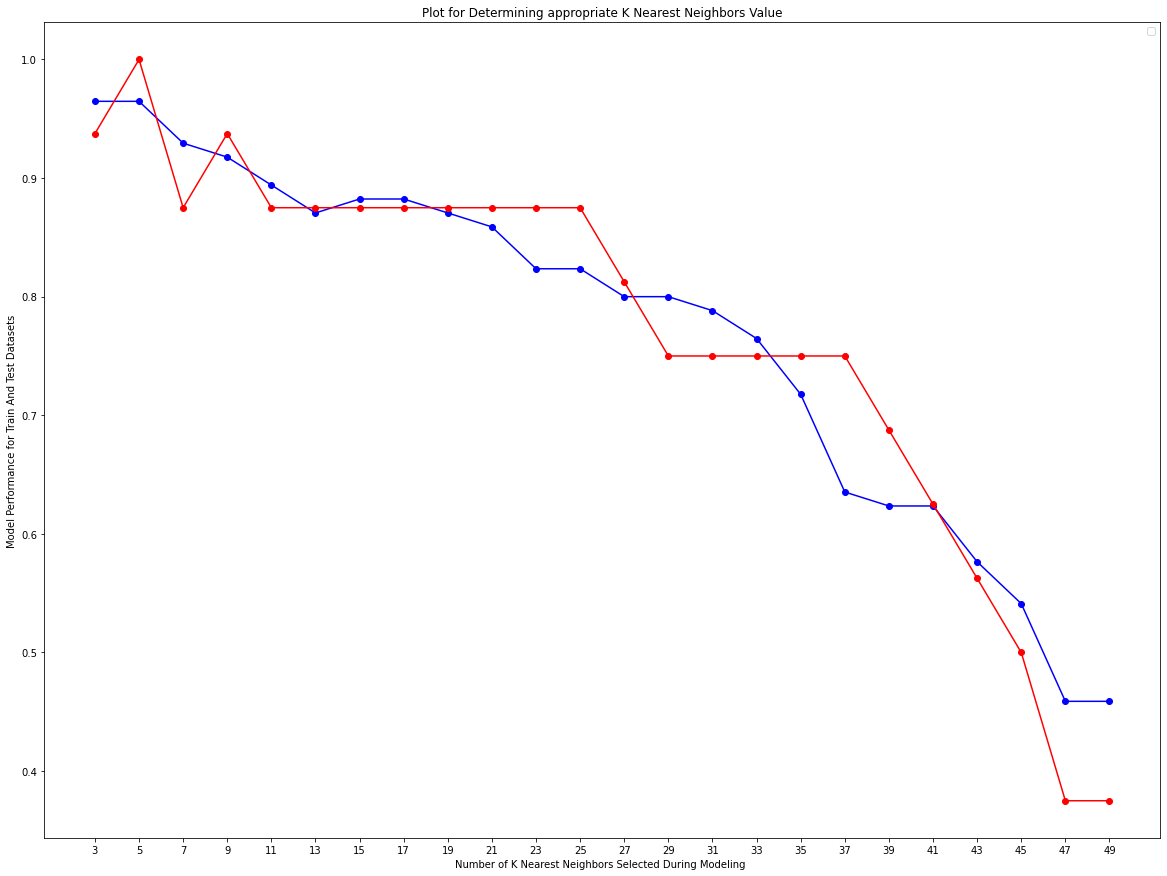

In [37]:
plt.figure(figsize=(20,15))
plt.legend(["Training_Set","Testing_Set"])
plt.xlabel("Number of K Nearest Neighbors Selected During Modeling ")
plt.ylabel("Model Performance for Train And Test Datasets")
plt.xticks(np.arange(3,50,2))
plt.title('Plot for Determining appropriate K Nearest Neighbors Value')

# train accuracy plot
plt.plot(np.arange(3,50,2),[i[0] for i in accuracy_list],"bo-")
# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in accuracy_list],"ro-")

In [38]:
#Prepare the Model by selecting appropriate K Nearest Neighbors value from the above graph Either 5 or 9
knc = KNeighborsClassifier(n_neighbors= 5)

# Fitting with training data
knc.fit(df_train.iloc[:,0:16],df_train.iloc[:,16])

# train accuracy
accuracy_train = np.mean(knc.predict(df_train.iloc[:,0:16])==df_train.iloc[:,16])
# test accuracy
accuracy_test = np.mean(knc.predict(df_test.iloc[:,0:16])==df_test.iloc[:,16])

print("Training Dataset Accuracy for KNN model in %:",accuracy_train*100)
print("Testing Dataset Accuracy for KNN model in %:",accuracy_test*100)

Training Dataset Accuracy for KNN model in %: 96.47058823529412
Testing Dataset Accuracy for KNN model in %: 100.0
